In [5]:
import os
# Changing the CWD
os.chdir('D:\Work\QA_QC_proj')
os.getcwd()


'D:\\Work\\QA_QC_proj'

In [ ]:
#pip install git+https://github.com/equinor/ecl.git

In [6]:
import pandas as pd
import numpy as np

from qa_qc_lib.tests.wells.wells_tests import QA_QC_wells as Tests_wells_data
from qa_qc_lib.tests.wells.wells_nodes import Nodes_wells_data

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#nodes_obj = Nodes_wells_data('data\wells_data', 'Добыча.vol' ) или
nodes_obj = Nodes_wells_data('data\wells_data', ('FULL_TNAV__626.SMSPEC', 'FULL_TNAV__626.UNSMRY'))


In [8]:
tests_wells = Tests_wells_data(nodes_obj, 'data\wells_data')


In [9]:
first_tests = tests_wells.order_tests[1] 
second_tests = tests_wells.order_tests[2]


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


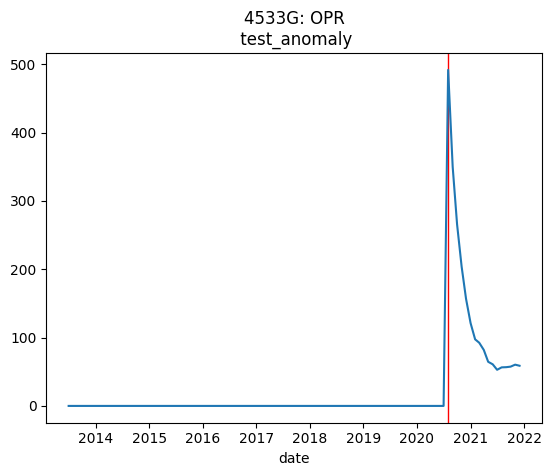


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


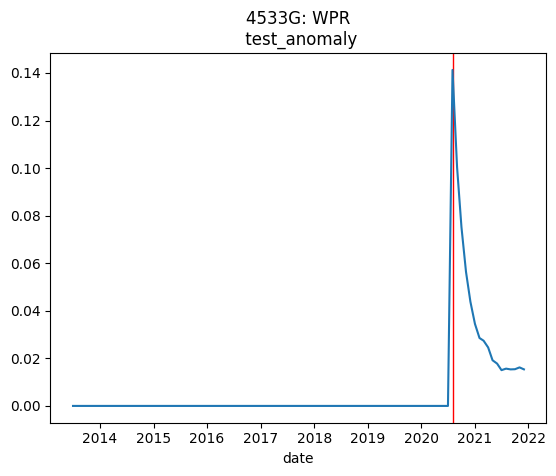


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


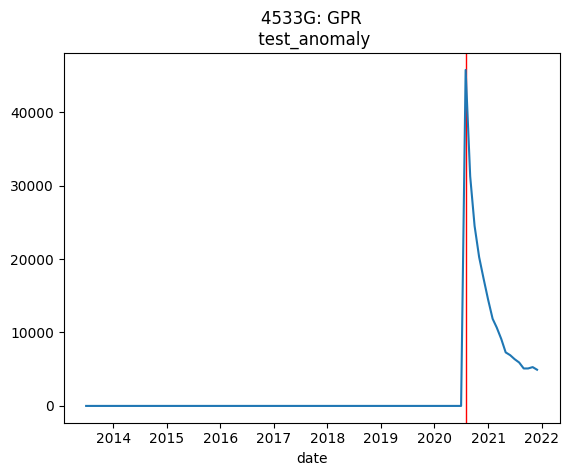


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


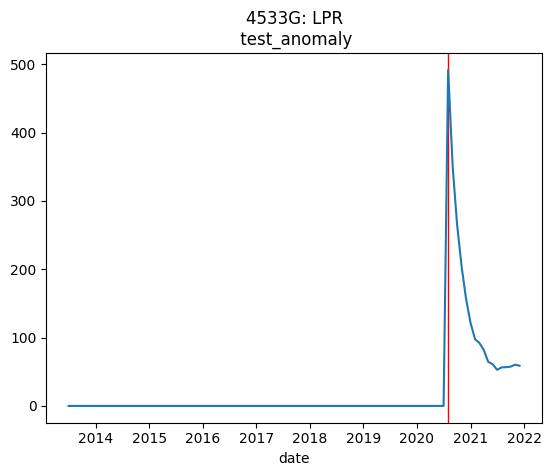


     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


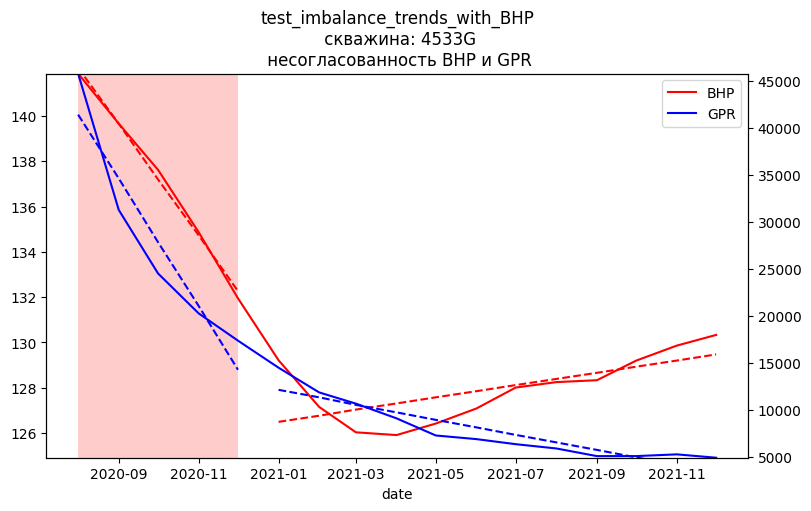

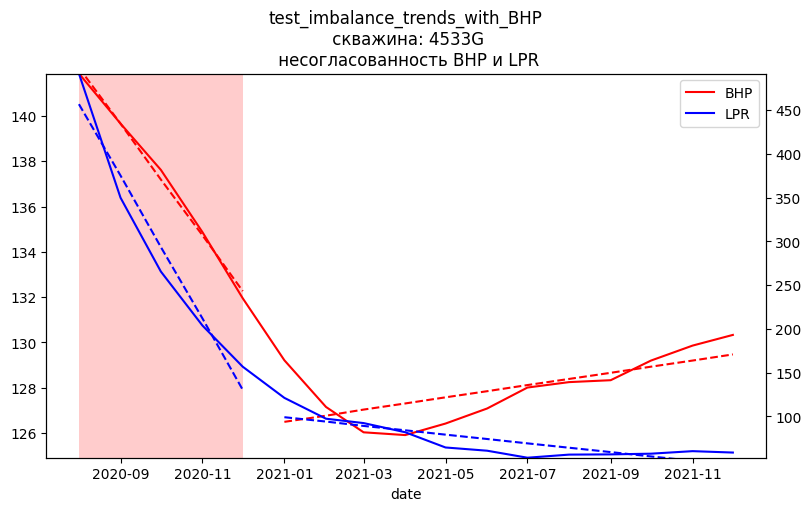



     Тест не пройден.
     При резком изменении ВНР должен быть отклик на дебите, 
(резкое снижение ВНР влечет увеличение дебита (наоборот с закачкой) и обратная ситуация). 

------------------------------------------------------------------------------------


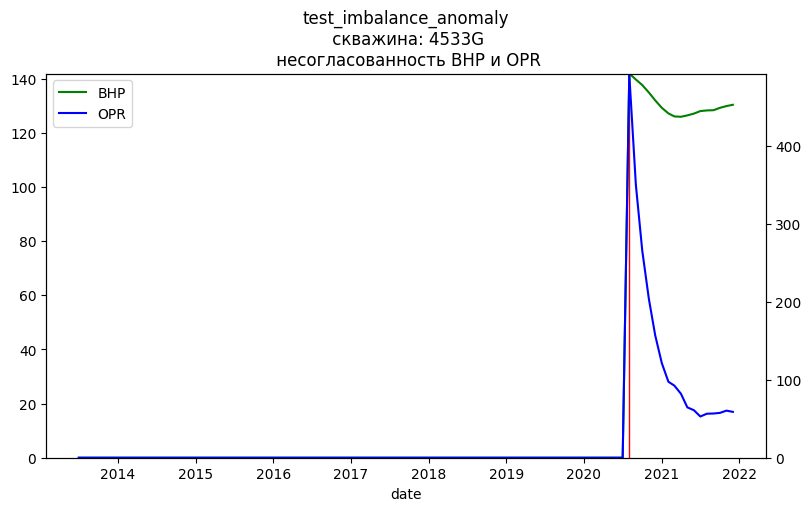

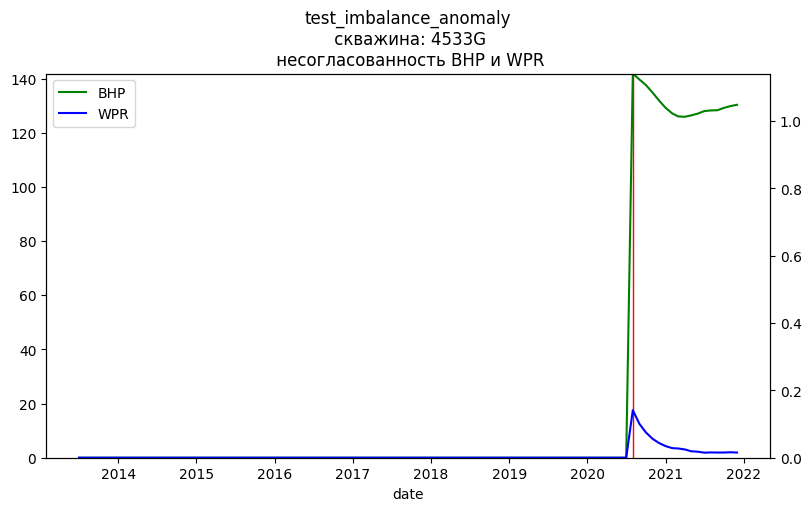

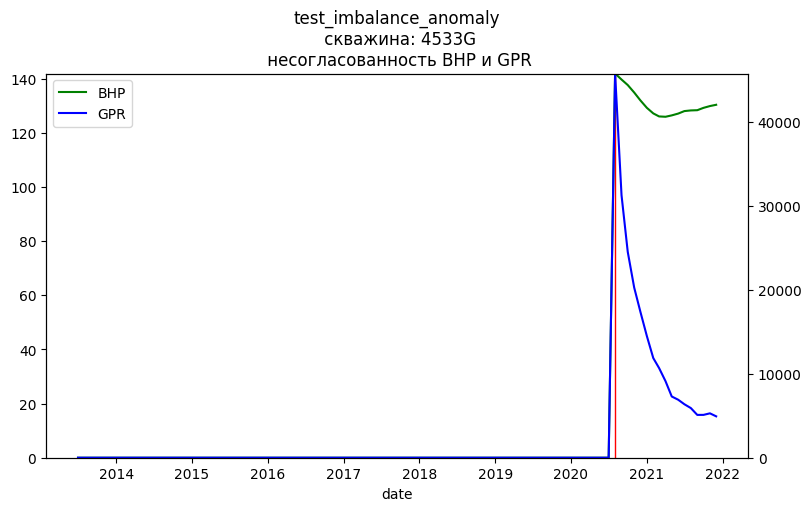

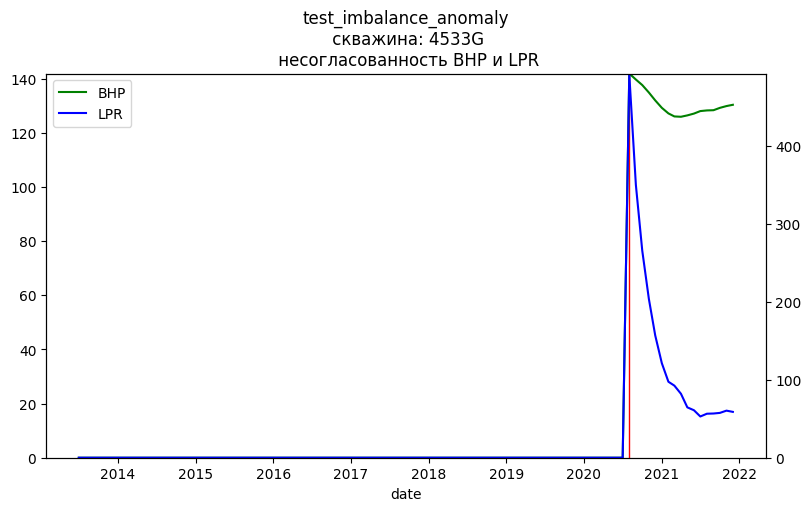


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


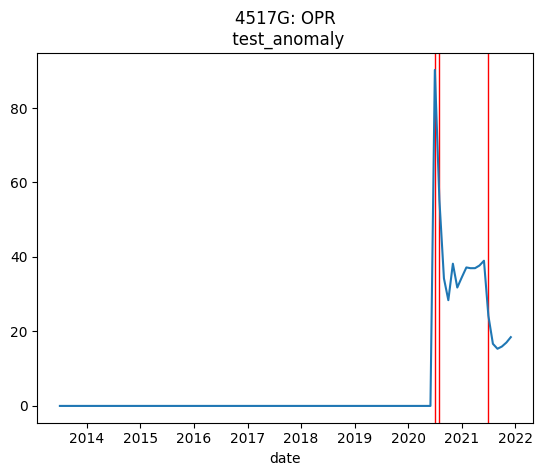


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


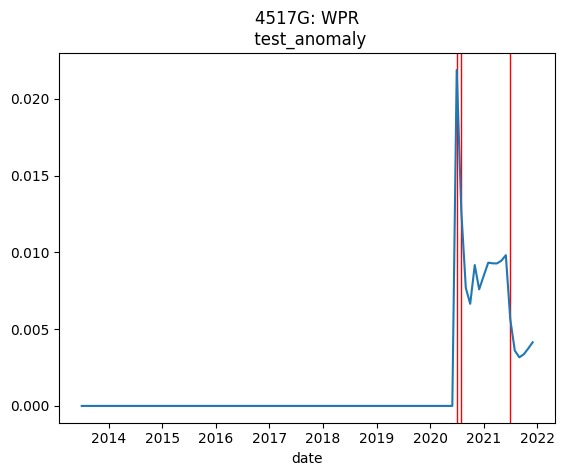


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


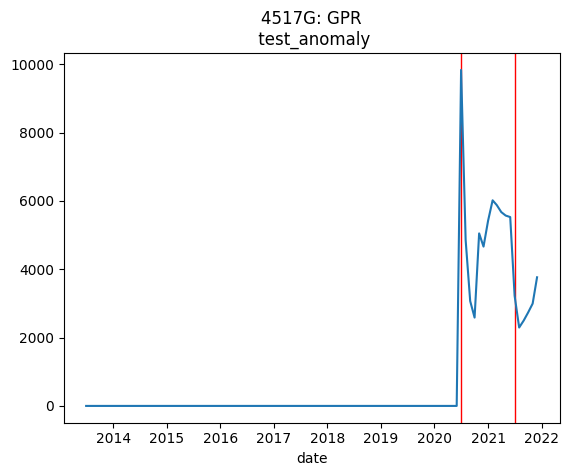


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


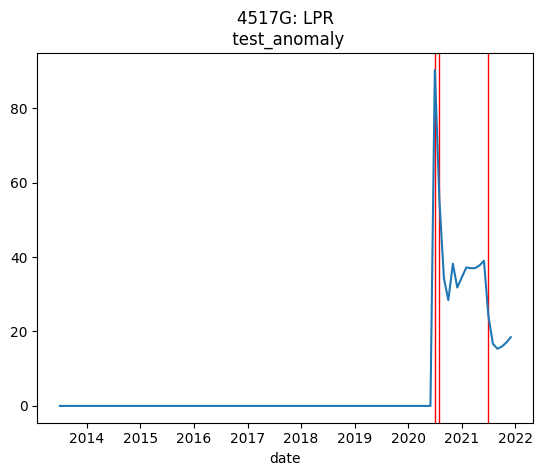


     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


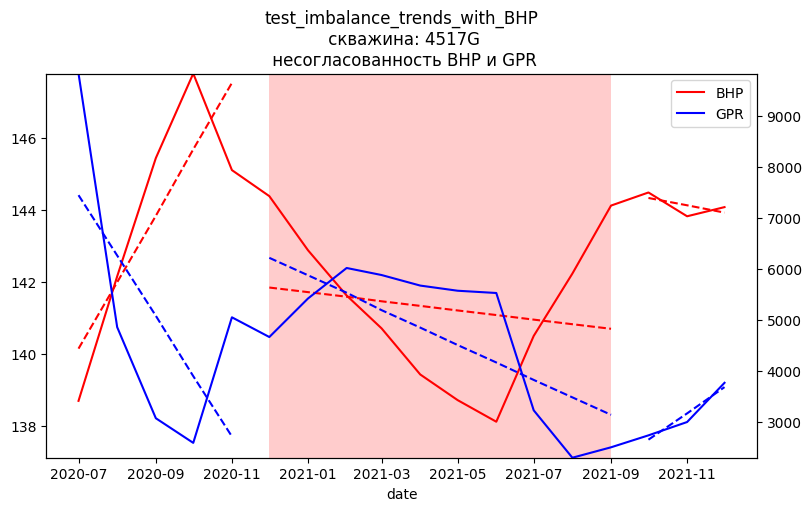

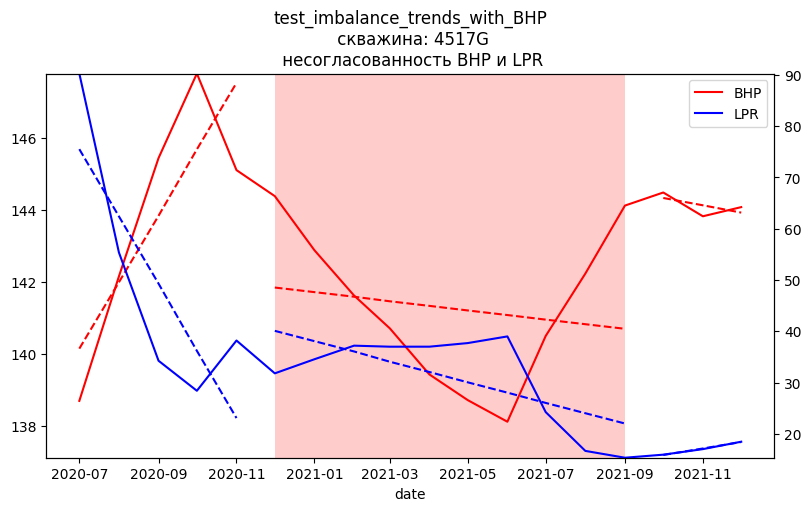



     Тест не пройден.
     При резком изменении ВНР должен быть отклик на дебите, 
(резкое снижение ВНР влечет увеличение дебита (наоборот с закачкой) и обратная ситуация). 

------------------------------------------------------------------------------------


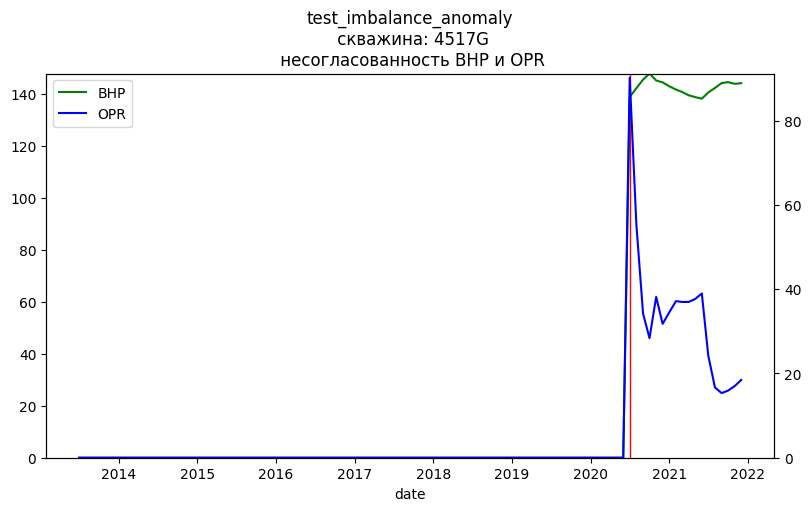

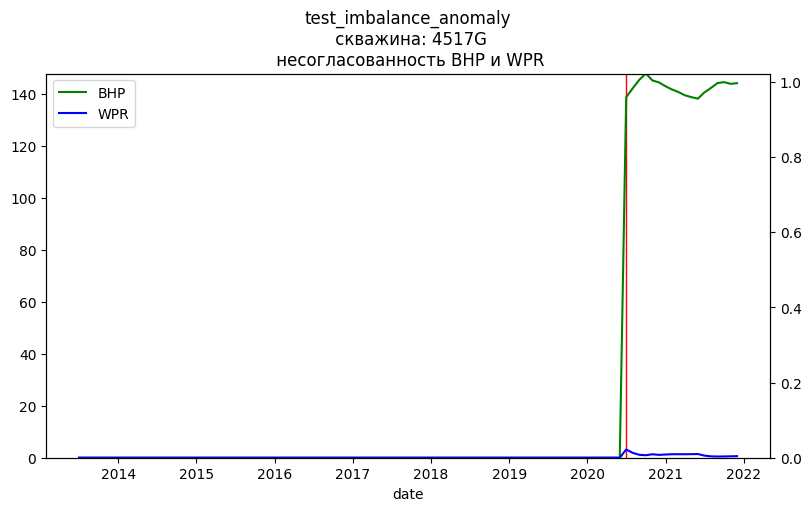

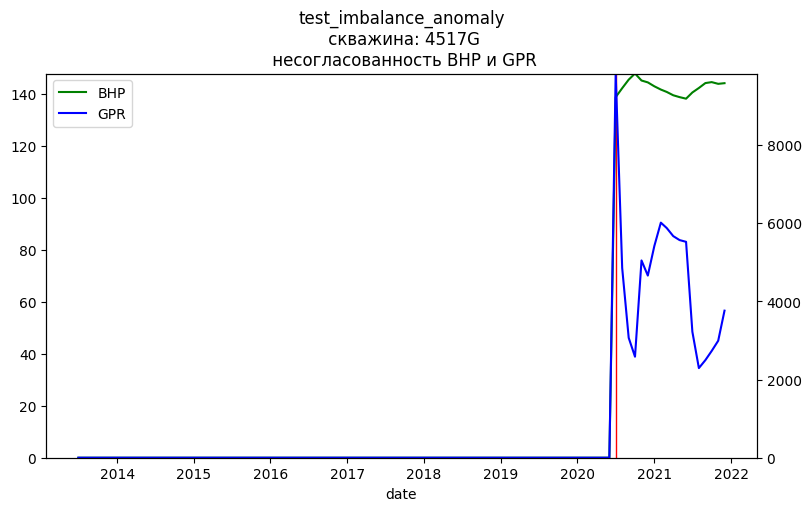

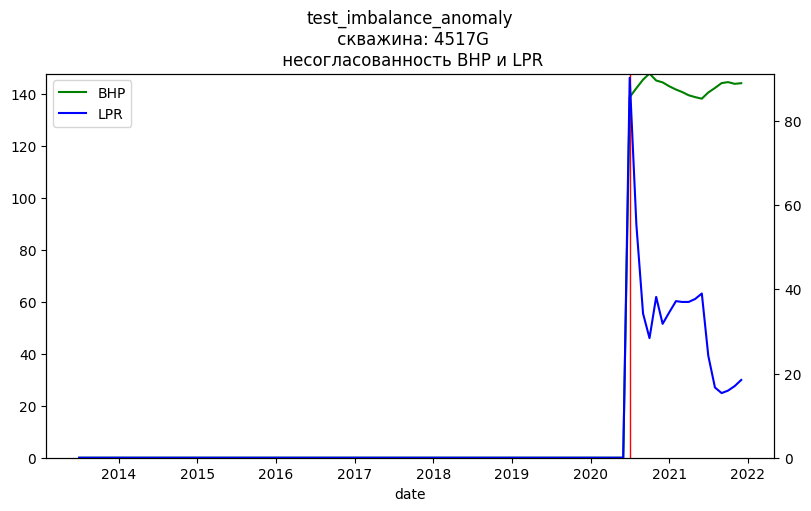


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


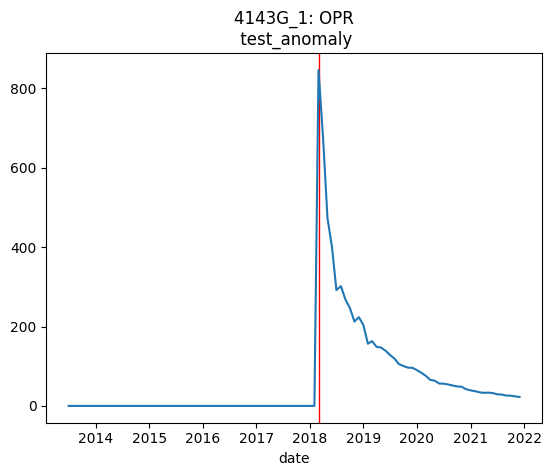


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


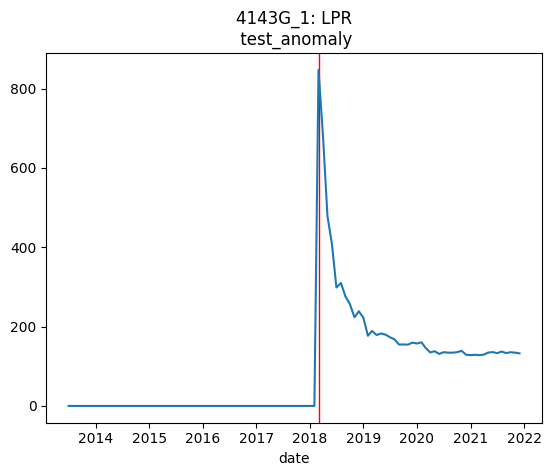


     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


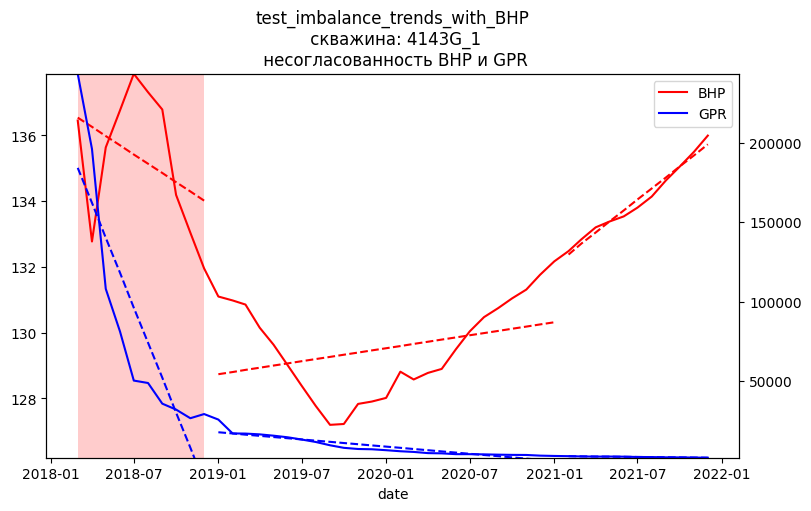

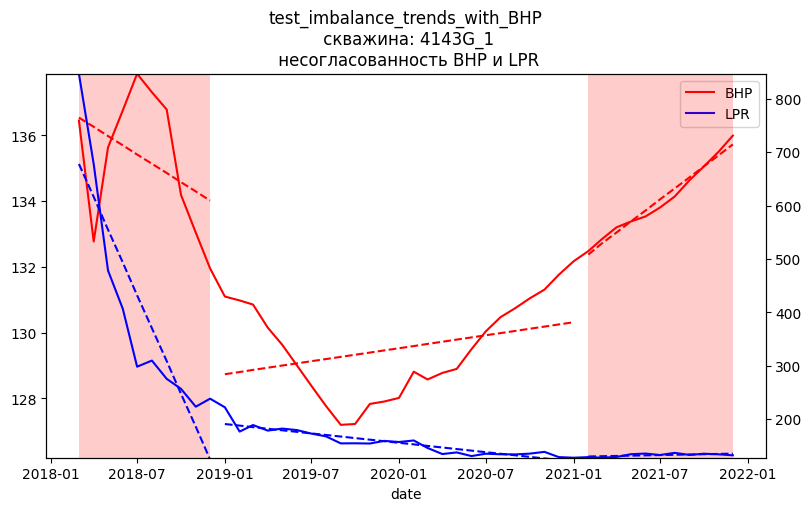



     Тест не пройден.
     При резком изменении ВНР должен быть отклик на дебите, 
(резкое снижение ВНР влечет увеличение дебита (наоборот с закачкой) и обратная ситуация). 

------------------------------------------------------------------------------------


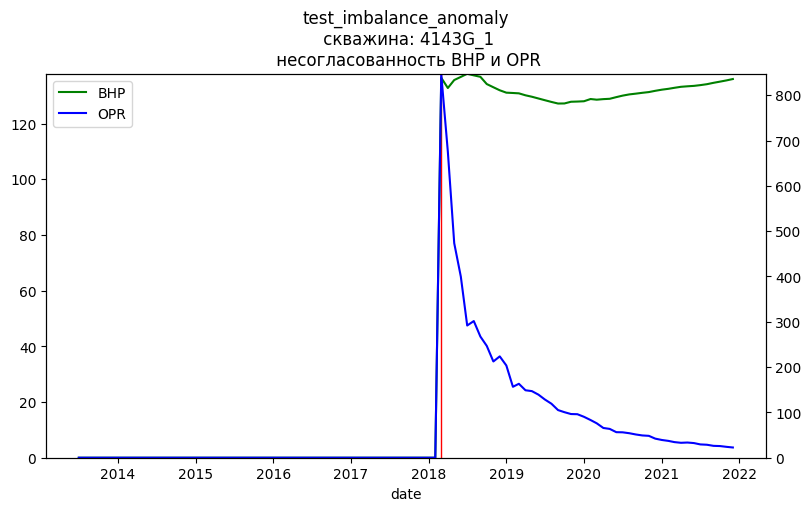

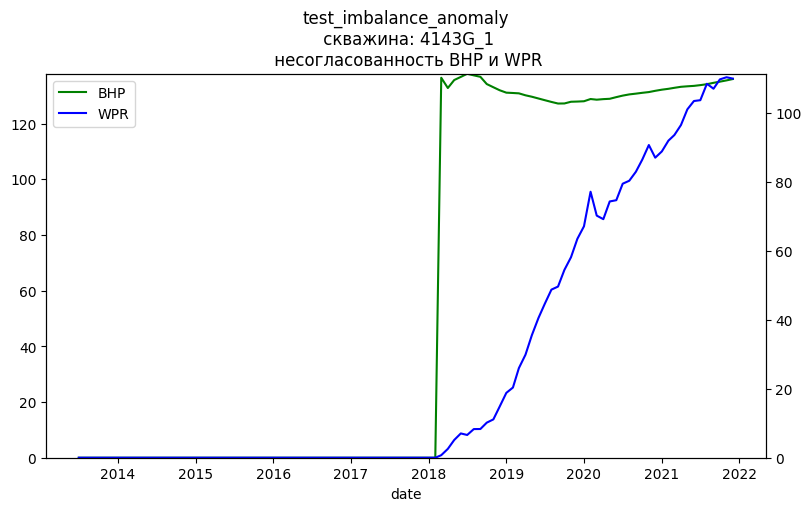

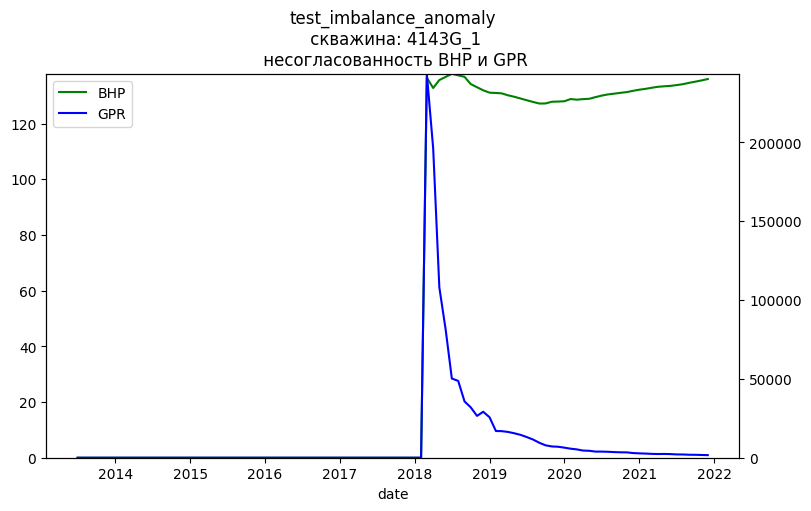

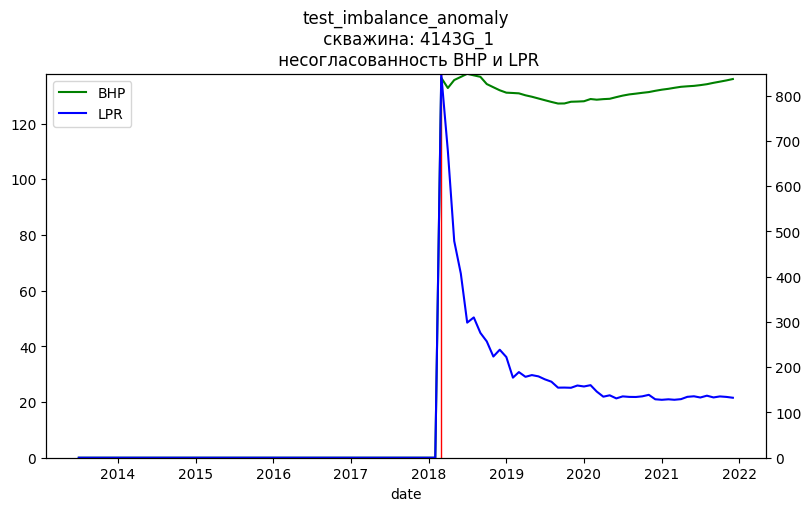


     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


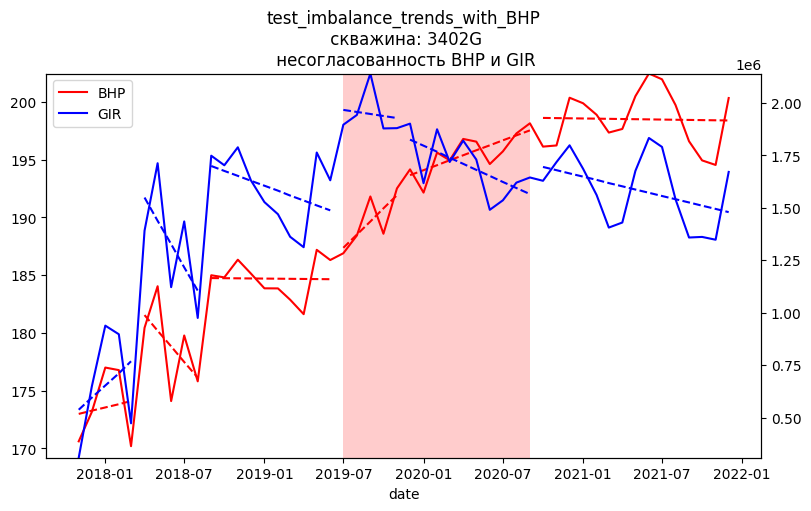



     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


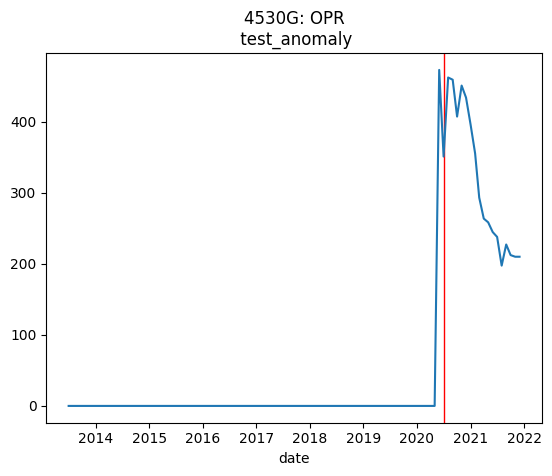


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


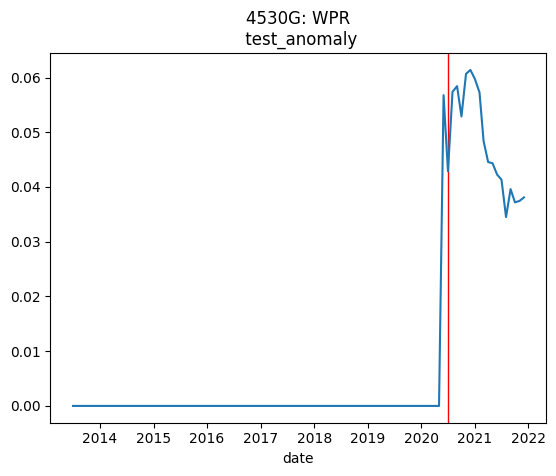


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


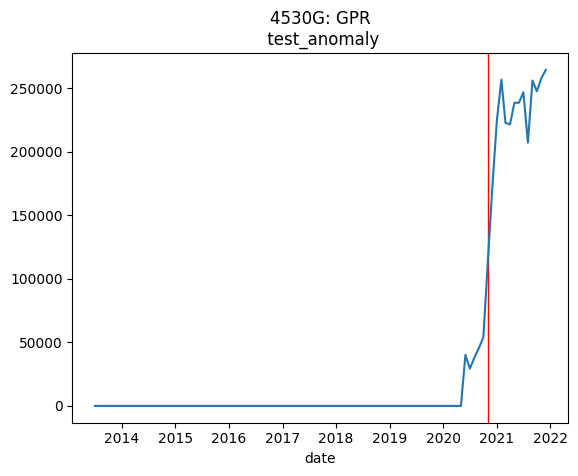


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


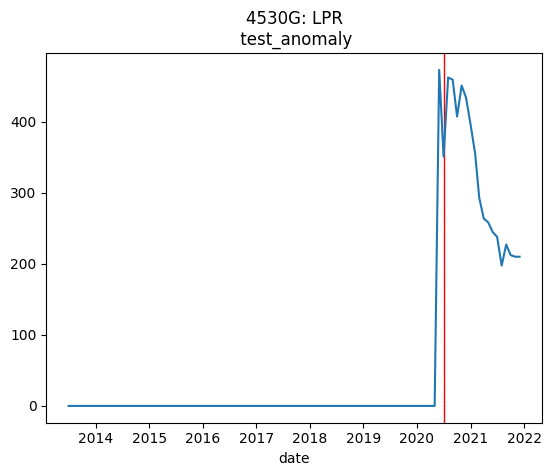


     Тест не пройден.
     значения  ряда LPR не равны сумме значений рядов OPR и WPR
------------------------------------------------------------------------------------


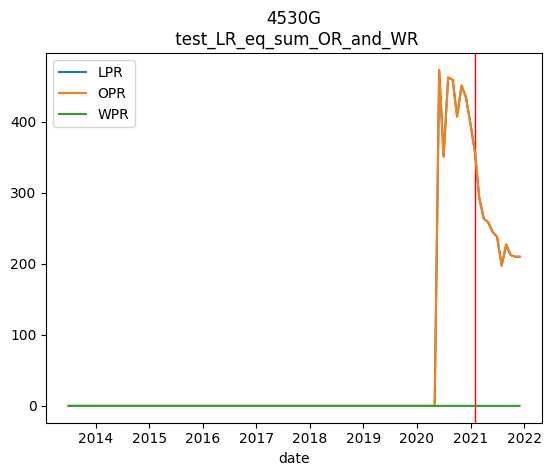


     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


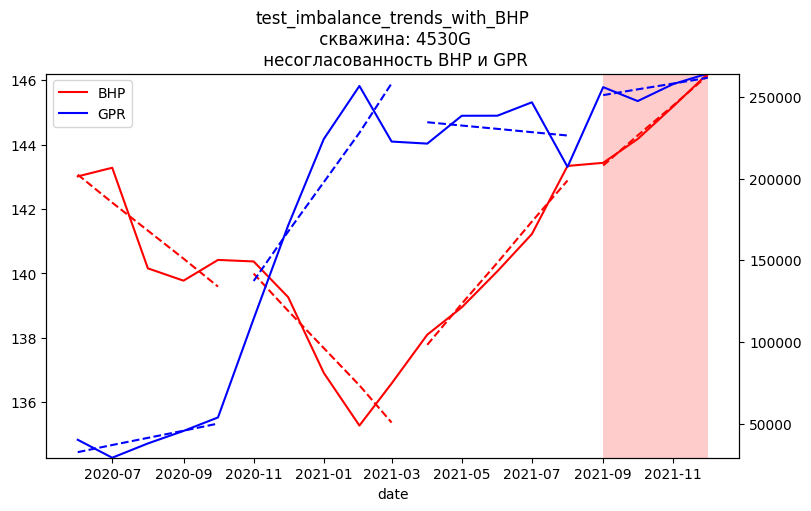

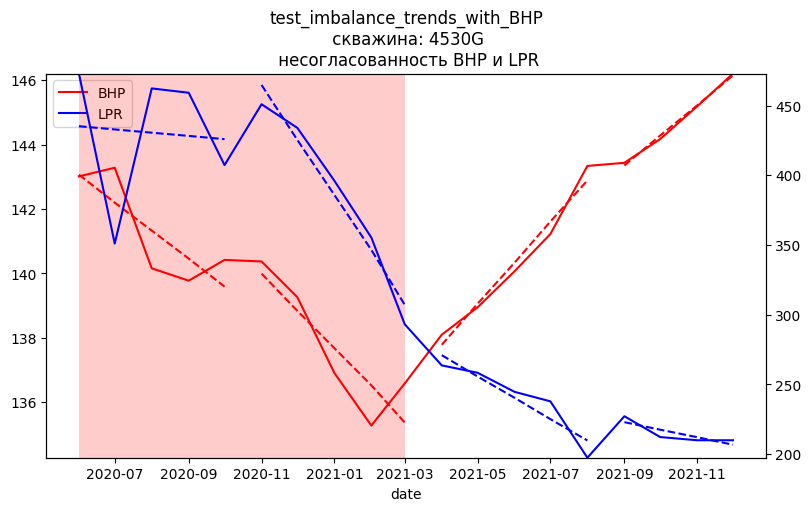



     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


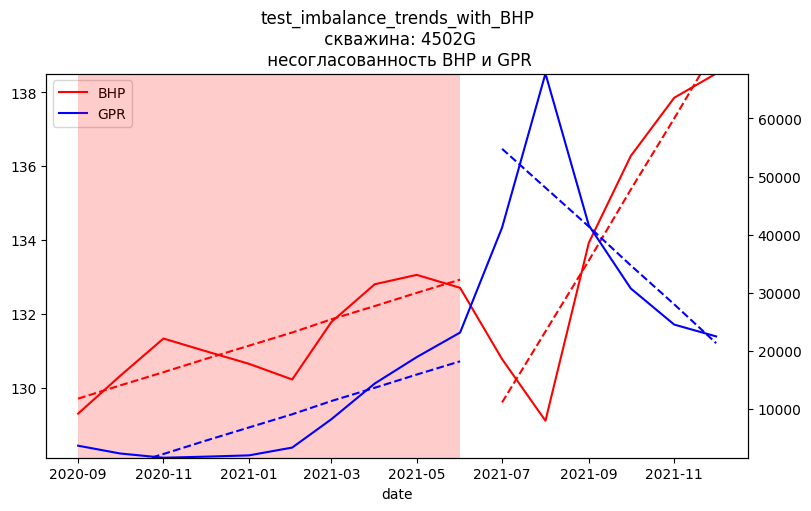

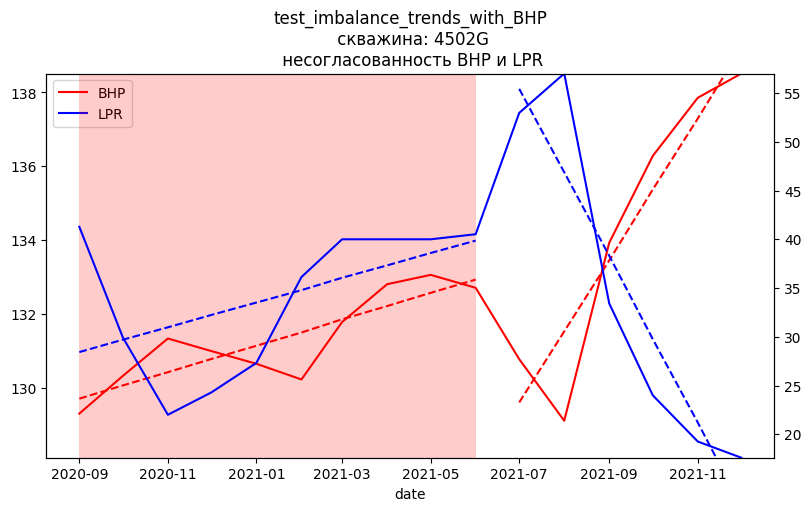




     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


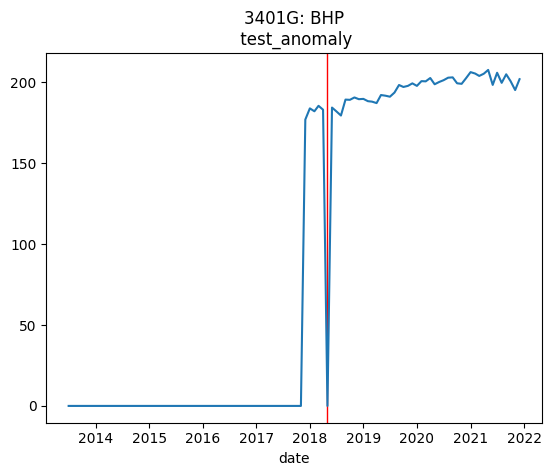


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


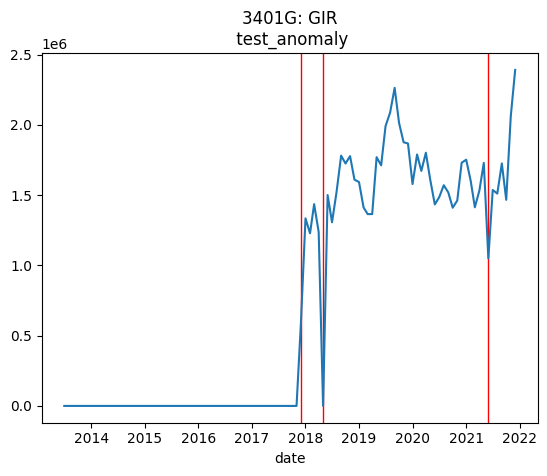


     Тест не пройден.
     Знаяения ряда не возрастают монотонно
------------------------------------------------------------------------------------


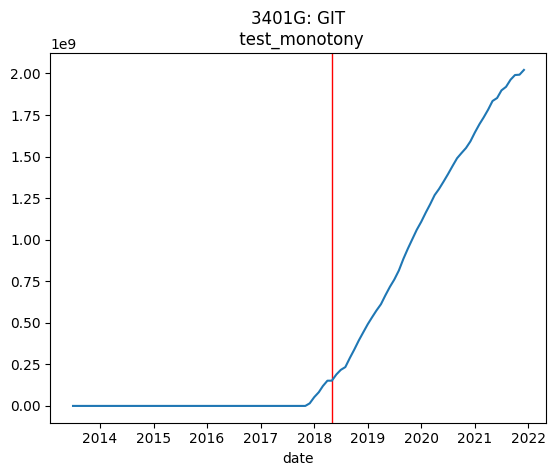


     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


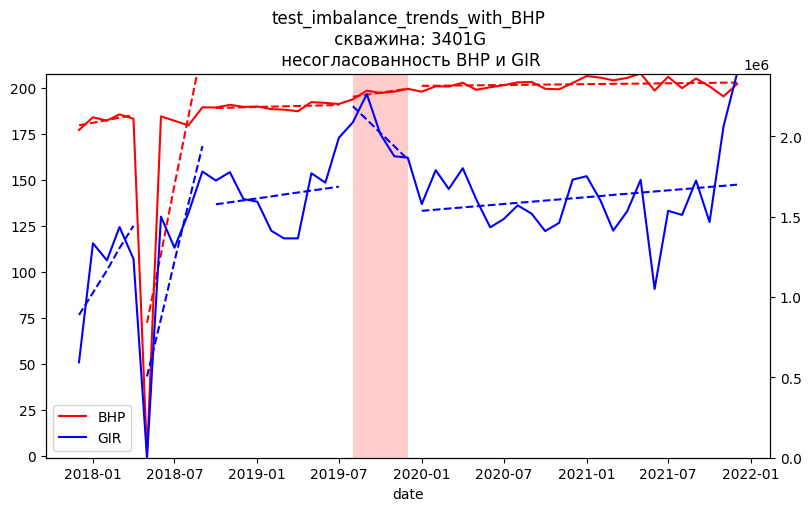



     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


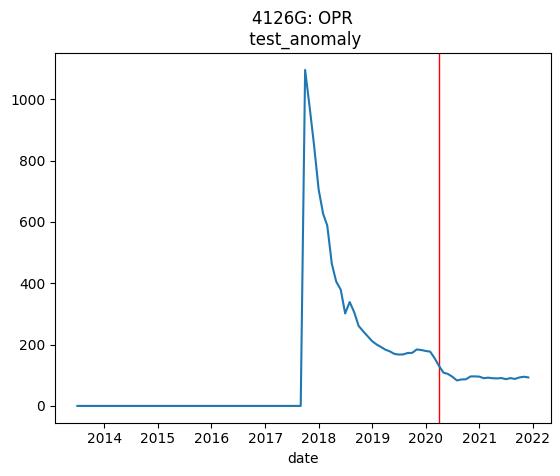


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


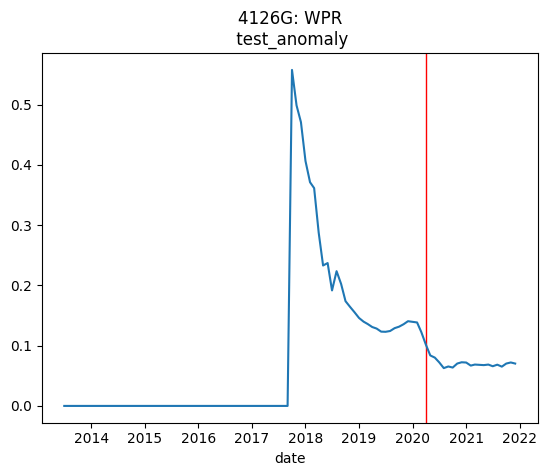


     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


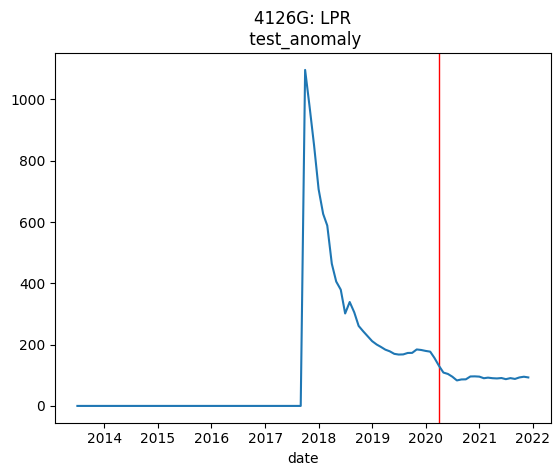


     Тест не пройден.
     значения  ряда LPR не равны сумме значений рядов OPR и WPR
------------------------------------------------------------------------------------


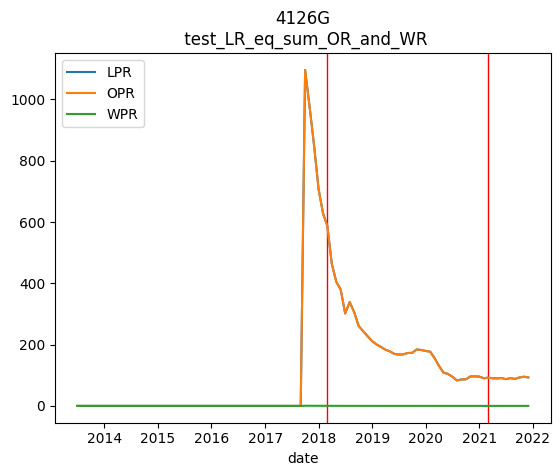


     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


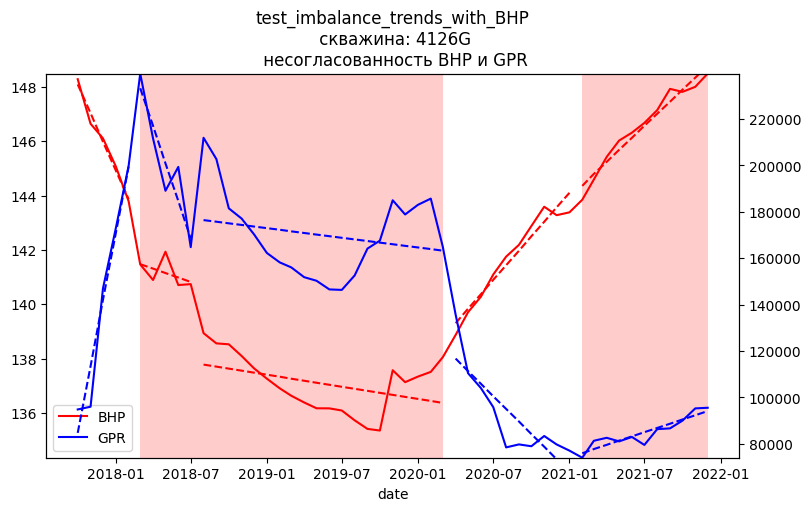

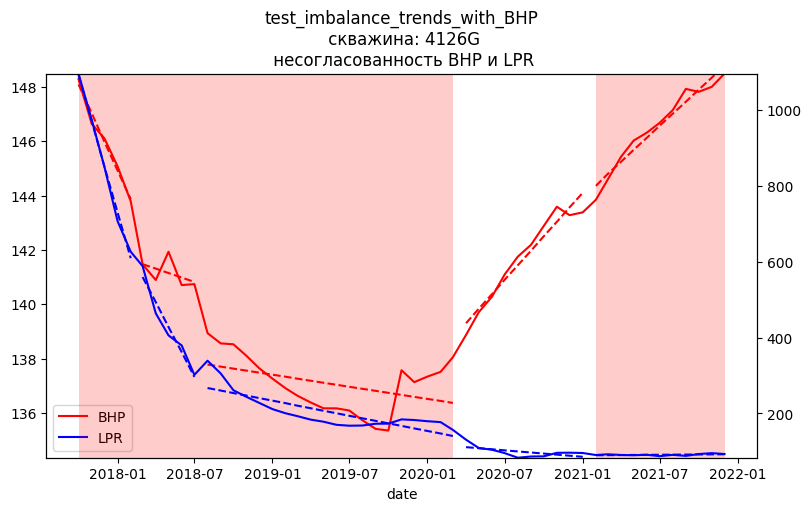



     Тест не пройден.
     В знаяениях ряда присутствуют аномалии
------------------------------------------------------------------------------------


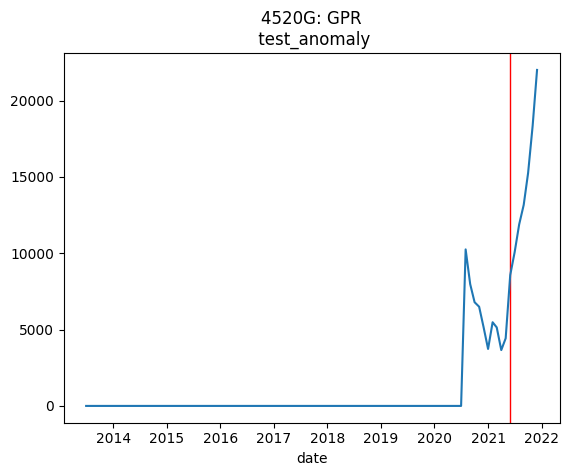


     Тест не пройден.
     При тренде на снижении ВНР должен наблюдаться рост LPR/GPR (и наоборот).Отклонение от этого возможно, 
но оно должно проверяться на интерференцию, изменение подвижностей жидкостей, активность газовой шапки, 
но пока не в автоматическом режиме.
------------------------------------------------------------------------------------


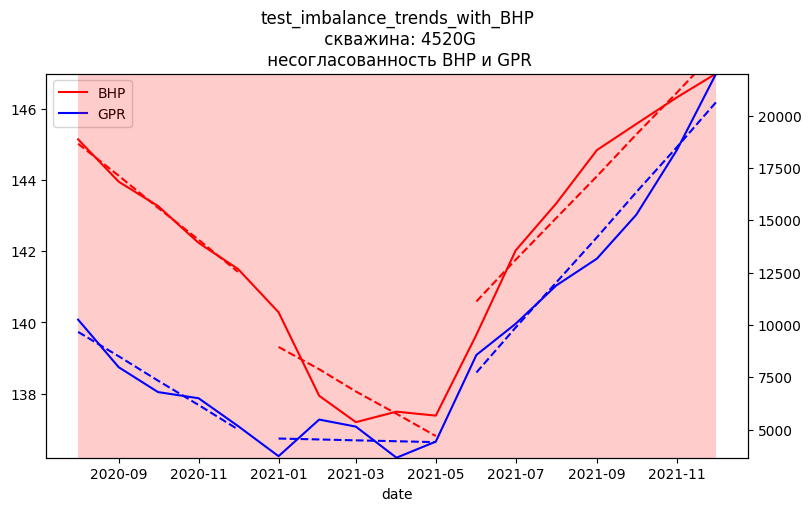

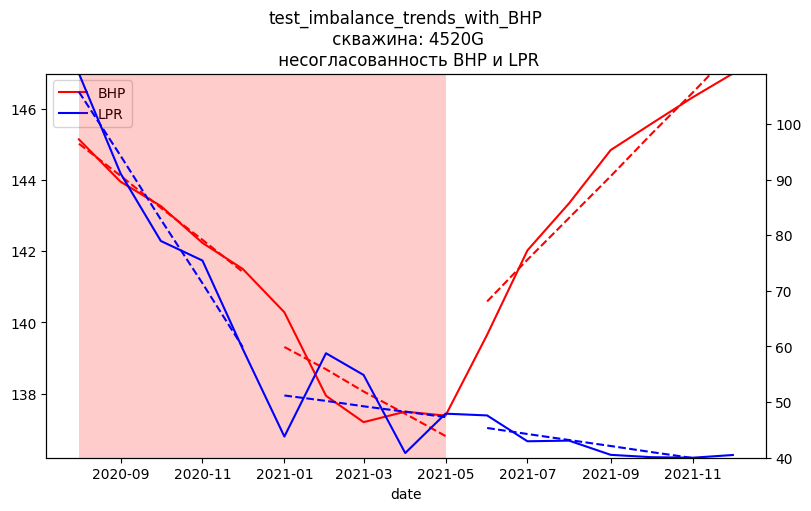



     Тест не пройден.
     При резком изменении ВНР должен быть отклик на дебите, 
(резкое снижение ВНР влечет увеличение дебита (наоборот с закачкой) и обратная ситуация). 

------------------------------------------------------------------------------------


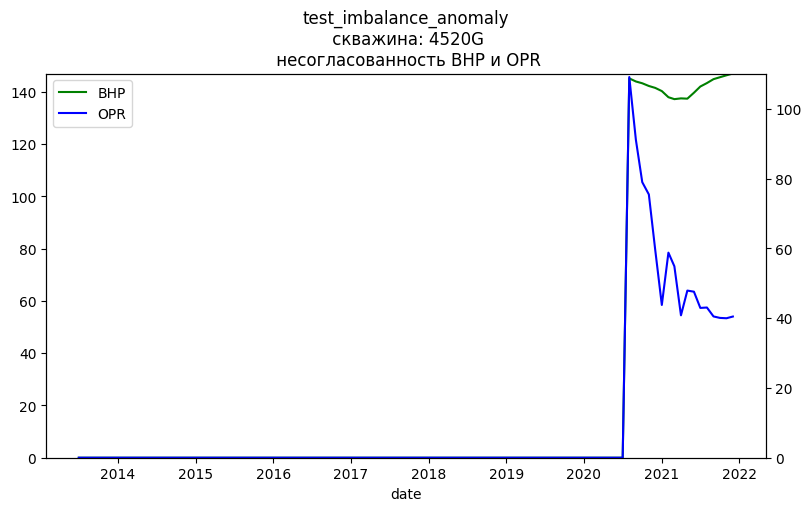

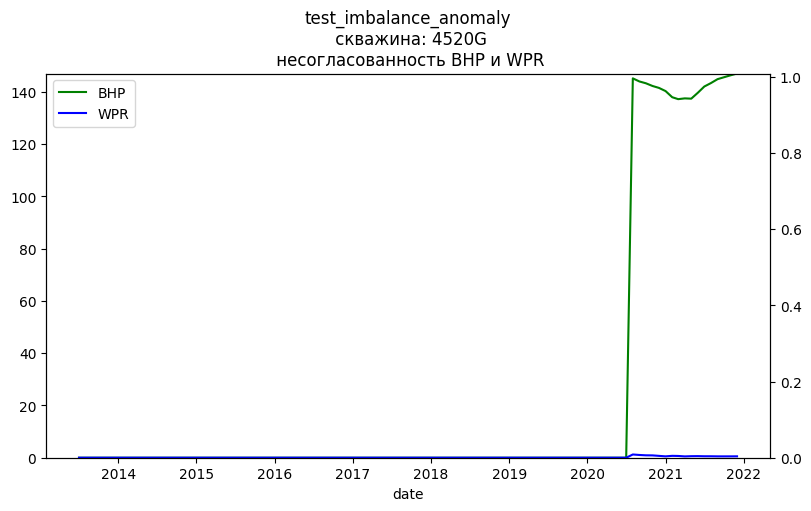

KeyboardInterrupt: 

In [10]:
for well in nodes_obj.wells:

    for k,v in nodes_obj.nodes_wells[well].items():
        for test in first_tests:
            test_f = getattr(tests_wells, test)
            res_test = test_f(v, k, well, get_report= False)

            if res_test['data_availability'] and not res_test['result']:
                tests_wells.report_function[test](res_test['specification'], saving = False)

    for test in second_tests:
        test_f = getattr(tests_wells, test)
        res_test = test_f(well, get_report= False)
        
        if res_test['data_availability'] and not res_test['result']:
            tests_wells.report_function[test](res_test['specification'], saving = False)
